<a href="https://colab.research.google.com/github/NIP-Data-Computation/show-and-tell/blob/master/geneb_show_and_tell_week3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 3 DataCamp Show and Tell**

**Author:** 

Gene Carlo F. Belinario 

III BS Applied Physics - Instrumentation Physics

**Topics:** 
*   Introduction to Data Visualization with Seaborn
*   Introduction to Importing Data in Python
*   Intermediate Importing Data in Python

**General Objective:** Demonstrate importing of data in Python and perform basic data visualization using Seaborn

**Specific Objectives:**
*   Import Customs data and visualize VAT paid on BOC transactions from 2016 to 2019 using Seaborn library
*   Import an HDF5 file of one gravitational waves observation from LIGO website and visualize using Seaborn


# **Application on the PHL Customs Dataset**

**Task:** Compare and track the monthly average of VAT paid on transactions in BOC in the period 2016 - 2019. 

In [146]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Mount drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
# Check if mounting is successful, intended files must appear in the output
!ls drive/My\ Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL\ Customs\ Open\ Data/clean/csv

boc_lite_2012_2019_top9_hscode.csv  boc_lite_2015.csv  boc_lite_2019.csv
boc_lite_2012.csv		    boc_lite_2016.csv  gapminder.csv
boc_lite_2013.csv		    boc_lite_2017.csv
boc_lite_2014.csv		    boc_lite_2018.csv


In [6]:
# Import datasets from 2016, 2017, 2018, and 2019
# The file name was not recognized, so I manually put the filepath as the argument
data_2016 = pd.read_csv('/content/drive/My Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv/boc_lite_2016.csv', encoding = "ISO-8859-1")
data_2017 = pd.read_csv('/content/drive/My Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv/boc_lite_2017.csv', encoding = "ISO-8859-1")
data_2018 = pd.read_csv('/content/drive/My Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv/boc_lite_2018.csv', encoding = "ISO-8859-1")
data_2019 = pd.read_csv('/content/drive/My Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv/boc_lite_2019.csv', encoding = "ISO-8859-1")


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,25,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Monthly total VAT paid on transaction 
Year2016 = data_2016.groupby('tm')[['vatpaid']].sum()
Year2017 = data_2017.groupby('tm')[['vatpaid']].sum()
Year2018 = data_2018.groupby('tm')[['vatpaid']].sum()
Year2019 = data_2019.groupby('tm')[['vatpaid']].sum()

# Change indexes for each year
index2016 = []
for index in Year2016.index.str.replace('2016m',''):
  index2016.append(int(index))
Year2016['month'] = index2016

index2017 = []
for index in Year2017.index.str.replace('2017m',''):
  index2017.append(int(index))
Year2017['month'] = index2017

index2018 = []
for index in Year2018.index.str.replace('2018m',''):
  index2018.append(int(index))
Year2018['month'] = index2018

index2019 = []
for index in Year2019.index.str.replace('2019m',''):
  index2019.append(int(index))
Year2019['month'] = index2019

print(Year2016)

In [ ]:
# Sort the new indexes
Year2016_sorted = pd.DataFrame(Year2016.reset_index(drop=True).set_index('month').sort_index().reset_index())
Year2017_sorted = pd.DataFrame(Year2017.reset_index(drop=True).set_index('month').sort_index().reset_index())
Year2018_sorted = pd.DataFrame(Year2018.reset_index(drop=True).set_index('month').sort_index().reset_index())
Year2019_sorted = pd.DataFrame(Year2019.reset_index(drop=True).set_index('month').sort_index().reset_index())

print(Year2016_sorted)

In [ ]:
# Merge the DataFrames chronologically based on year
Period1619 = Year2016_sorted.append(Year2017_sorted).append(Year2018_sorted).append(Year2019_sorted)

print(Period1619)

In [ ]:
# Add a new column for identifying the year
year = ['2016','2016','2016','2016','2016','2016','2016','2016','2016','2016','2016','2016','2017','2017','2017','2017','2017','2017','2017','2017','2017',
        '2017','2017','2017','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2019','2019','2019','2019','2019','2019',
        '2019','2019','2019','2019','2019','2019']

Period1619['year'] = year

print(Period1619)

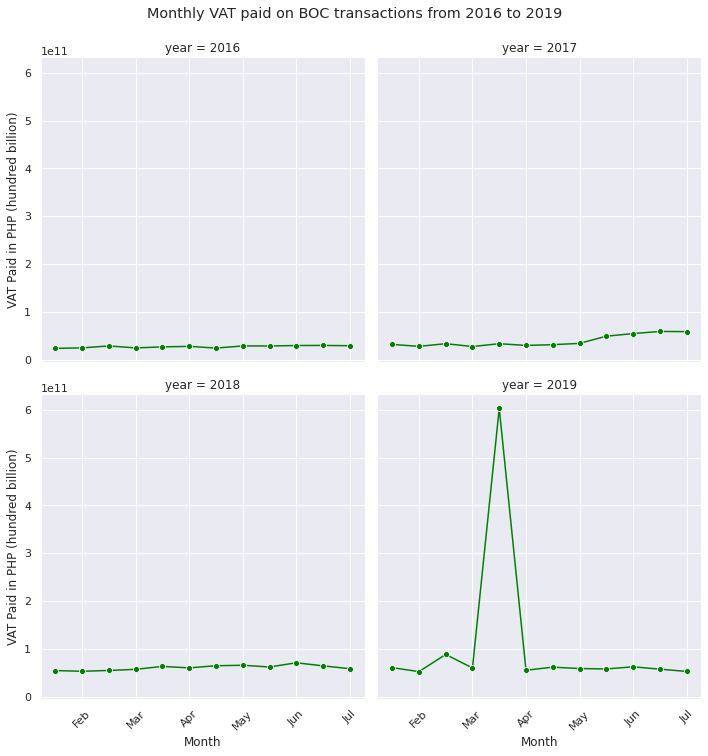

In [160]:
# Create a line plot showing a comparison of monthly VAT collections from 2016 - 2019 using Seaborn library
sns.set_style('darkgrid')
sns.set_context('notebook')

lp = sns.relplot(x='month', y='vatpaid', data=Period1619, kind='line', color='green', marker='o', col='year', col_wrap=2)

lp.fig.suptitle('Monthly VAT paid on BOC transactions from 2016 to 2019', y=1.03)
lp.set(ylabel='VAT Paid in PHP (hundred billion)', xlabel='Month')
lp.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)


plt.show()